In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T = 100.0
dt = 0.05
N = int(T/dt) + 1
t = np.arange(0.0, T + dt, dt)

In [3]:
z0 = 100.0
zt = 100.0
b0 = 10.0
g = 9.81

u = np.array([z0, b0])
z = np.zeros(N)
z[0] = z0

In [4]:
for i in range(1, N):
    rhs = np.array([u[1], g*(1 - u[0]/zt)])
    u += dt*rhs
    z[i] = u[0]

In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

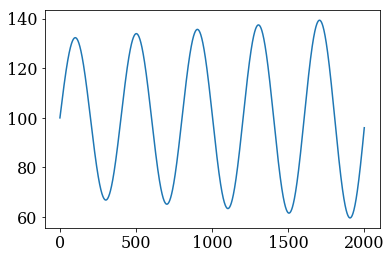

In [6]:
plt.plot(z)
plt.show()

In [7]:
z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
           (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)

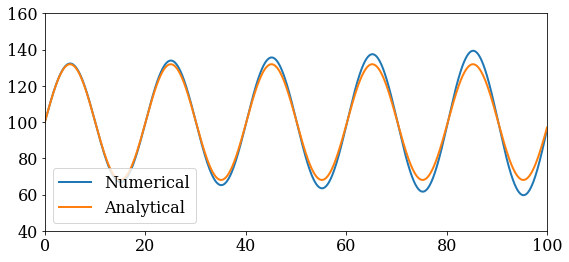

In [8]:
plt.figure(figsize=(9.0, 4.0))
plt.plot(t, z, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
plt.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
plt.xlim(t[0], t[-1])  # set the x-axis limits
plt.ylim(40.0, 160.0)  # set the y-axis limits
plt.legend()

In [9]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    # Set the initial conditions.
    u = np.array([z0, b0])
    z = np.empty_like(t)
    z[0] = z0
    # Temporal integration using Euler's method.
    for n in range(1, N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  # store the elevation at time-step n+1
    z_values.append(z)  # store the elevation over the time

In [10]:
def Euler_method(T, dt, z0, b0, zt):
    """
    Emplement Euler method to solve ODE
    describing Phygoid Oscillations
    
    Parameters
    ----------
    T : float
        Length of the time-interval.
    dt : float
        Time-step grid.
    z0, b0 : float
        Initial conditions.
    zt : float
        Essectial constant.
        
    Return
    ----------
    z : np.array
        The numerical solution as an array of floats.
    """
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    # Set the initial conditions.
    u = np.array([z0, b0])
    z = np.empty_like(t)
    z[0] = z0
    # Temporal integration using Euler's method.
    for n in range(1, N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  # store the elevation at time-step n+1
    return z

In [11]:
for dt in dt_values:
    z_values.append(Euler_method(T, dt, z0, b0, zt))  # store the elevation over the time

In [12]:
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error
    (between the numerical and exact solutions)
    in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats.
    z_exact : numpy.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.
        
    Returns
    -------
    error: float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * np.sum(np.abs(z - z_exact))
    return error

In [13]:
# Create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    # Compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
               (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

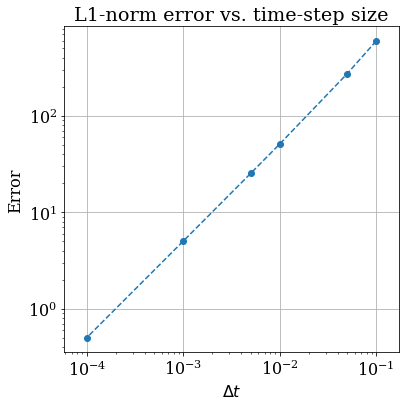

In [14]:
# Plot the error versus the time-step size.
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm error vs. time-step size')  # set the title
plt.xlabel('$\Delta t$')  # set the x-axis label
plt.ylabel('Error')  # set the y-axis label
plt.grid()
plt.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
plt.axis('equal');  # make axes scale equally